In [1]:
import tensorflow.keras
import tensorflow as tf
from homemade_unet import unet_model_3d
from tensorflow.keras.models import load_model
import os
import numpy as np
from nibabel.testing import data_path
import nibabel as nib
import pylab as plt
from utils.patches import *

CARGAR MODELO

In [2]:
path_weights = 'models/best/overfit_tversky_model.h5'
patch_shape = (64,64,64)
input_shape = (1,patch_shape[0],patch_shape[1],patch_shape[2])
model = unet_model_3d(input_shape = input_shape, n_labels = 3)
model.load_weights(path_weights)

PROCESAR IMAGEN

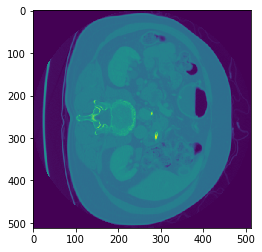

In [3]:
sample_image = "/home/jaume/Documentos/DL_postgraduate/final_project/sample_data/imagesTr/pancreas_001.nii.gz"
img = nib.load(sample_image)
img = np.array(img.dataobj)
plt.imshow(img[:,:,35])

In [4]:
indices = compute_patch_indices(img.shape,patch_shape)
print(len(indices))
indices

128


array([[  0,   0,  -9],
       [  0,   0,  55],
       [  0,  64,  -9],
       [  0,  64,  55],
       [  0, 128,  -9],
       [  0, 128,  55],
       [  0, 192,  -9],
       [  0, 192,  55],
       [  0, 256,  -9],
       [  0, 256,  55],
       [  0, 320,  -9],
       [  0, 320,  55],
       [  0, 384,  -9],
       [  0, 384,  55],
       [  0, 448,  -9],
       [  0, 448,  55],
       [ 64,   0,  -9],
       [ 64,   0,  55],
       [ 64,  64,  -9],
       [ 64,  64,  55],
       [ 64, 128,  -9],
       [ 64, 128,  55],
       [ 64, 192,  -9],
       [ 64, 192,  55],
       [ 64, 256,  -9],
       [ 64, 256,  55],
       [ 64, 320,  -9],
       [ 64, 320,  55],
       [ 64, 384,  -9],
       [ 64, 384,  55],
       [ 64, 448,  -9],
       [ 64, 448,  55],
       [128,   0,  -9],
       [128,   0,  55],
       [128,  64,  -9],
       [128,  64,  55],
       [128, 128,  -9],
       [128, 128,  55],
       [128, 192,  -9],
       [128, 192,  55],
       [128, 256,  -9],
       [128, 256

In [5]:
def merge_results(res):
    merged = res[0,1,:,:,:]
    for x in range(merged.shape[0]):
        for y in range(merged.shape[1]):
            for z in range(merged.shape[2]):
                if res[0,2,x,y,z]==1:
                    merged[x,y,z]=2
    return merged

In [9]:
patches = []
i=0
for index in indices[:1]:
    i+=1
    print("Processing patch number " + str(i))
    patch=get_patch_from_3d_data(img,patch_shape,index)/1024
    res = model.predict(np.expand_dims(np.expand_dims(patch,axis=0),axis=0))
    print(res)
    merged_res = merge_results(res)
    patches.append(merged_res)
print(len(patches))
patches[0].shape

Processing patch number 1
[[[[[0.2812091  0.20162663 0.1753655  ... 0.19005536 0.23822263
     0.32522368]
    [0.20893446 0.09716163 0.07348046 ... 0.07773608 0.13702145
     0.26568976]
    [0.17588362 0.08585509 0.06370758 ... 0.07685215 0.11522279
     0.27648634]
    ...
    [0.18762243 0.07812858 0.06475975 ... 0.07466996 0.1539922
     0.26911002]
    [0.20812425 0.11082622 0.08533923 ... 0.127664   0.19118398
     0.33710465]
    [0.27392125 0.16355711 0.14342132 ... 0.17777336 0.2517697
     0.36988795]]

   [[0.19498937 0.08025457 0.05648135 ... 0.08495817 0.11792275
     0.23284523]
    [0.08979753 0.03160904 0.01780264 ... 0.02860519 0.06312721
     0.14687254]
    [0.07351805 0.02282731 0.01812131 ... 0.02036836 0.05340742
     0.13918284]
    ...
    [0.06808795 0.02277594 0.01471857 ... 0.02947011 0.0713121
     0.15056387]
    [0.08292125 0.03175803 0.02993418 ... 0.05123271 0.12558347
     0.21330668]
    [0.16501617 0.09395524 0.07360017 ... 0.12054855 0.19434272
    

(64, 64, 64)

In [17]:
patches[0]

array([[[ 45.13647  ,  94.57922  , 123.434906 , ..., 142.60109  ,
         111.09722  ,  53.821808 ],
        [ 28.065891 ,  61.225357 , 140.41246  , ..., 201.30286  ,
         165.50984  ,  24.298923 ],
        [ 14.388563 ,  54.851616 , 131.7003   , ..., 213.9712   ,
         138.67888  ,  28.163465 ],
        ...,
        [ 45.34113  , 105.51407  , 203.80527  , ..., 302.84344  ,
         172.52731  ,  79.86294  ],
        [ 54.72324  , 108.033    , 102.632965 , ..., 125.80251  ,
          81.26045  ,  19.927685 ],
        [ 26.07229  , 101.595535 , 141.96875  , ..., 158.3453   ,
          79.772484 ,  84.47791  ]],

       [[ -0.       ,  -0.       ,  -0.       , ...,  44.66472  ,
          32.172195 ,  92.334656 ],
        [ 10.69015  ,  -0.       ,  18.183176 , ..., 133.07114  ,
         114.14421  , 119.70255  ],
        [ -0.       ,  -0.       ,  45.12559  , ..., 139.21393  ,
         109.82454  , 141.4528   ],
        ...,
        [ 30.143175 ,  32.11204  ,  96.55407  , ..., 2

In [ ]:
#reconstructed_image = reconstruct_from_patches(patches,indices,img.shape)
#plt.imshow(reconstructed_image[:,:,50])